https://dev.meteostat.net/python/daily.html#data-structure

[Data Sources](https://dev.meteostat.net/sources.html)

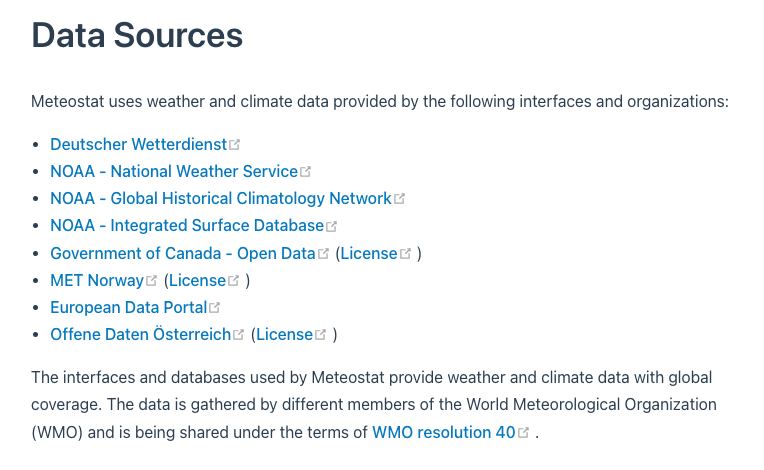

In [1]:
%pip install meteostat

Note: you may need to restart the kernel to use updated packages.


In [3]:
from datetime import datetime as dt
import pandas as pd
import meteostat as ms
import seaborn as sns

In [14]:
start = dt(2020, 1, 1)
end = dt(2021, 12, 29)

crown_point = (32.786670, -117.238620)

diego = ms.Point(crown_point[0], crown_point[1], 70)

data = ms.Daily(diego, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2020-01-01,13.6,7.4,18.5,0.0,0.0,268.0,6.1,NaN,1016.8,NaN
2020-01-02,14.7,9.6,20.2,0.0,0.0,357.0,5.4,NaN,1015.2,NaN
2020-01-03,14.7,9.0,20.7,0.0,0.0,336.0,4.0,NaN,1023.3,NaN
2020-01-04,13.9,7.9,20.2,0.0,0.0,343.0,4.7,NaN,1026.5,NaN
2020-01-05,13.7,7.9,20.7,0.0,0.0,346.0,4.3,NaN,1024.9,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-25,13.0,11.8,14.0,4.6,NaN,228.0,7.9,NaN,1017.5,NaN
2021-12-26,13.0,7.4,15.2,2.0,NaN,308.0,9.4,NaN,1019.0,NaN
2021-12-27,10.1,6.8,12.9,1.3,NaN,280.0,9.4,NaN,1017.7,NaN


In [24]:
ms.Daily(diego, start, end).fetch()['prcp']

time
2020-01-01    0.0
2020-01-02    0.0
2020-01-03    0.0
2020-01-04    0.0
2020-01-05    0.0
             ... 
2021-12-25    4.6
2021-12-26    2.0
2021-12-27    1.3
2021-12-28    2.0
2021-12-29    6.9
Freq: D, Name: prcp, Length: 729, dtype: float64

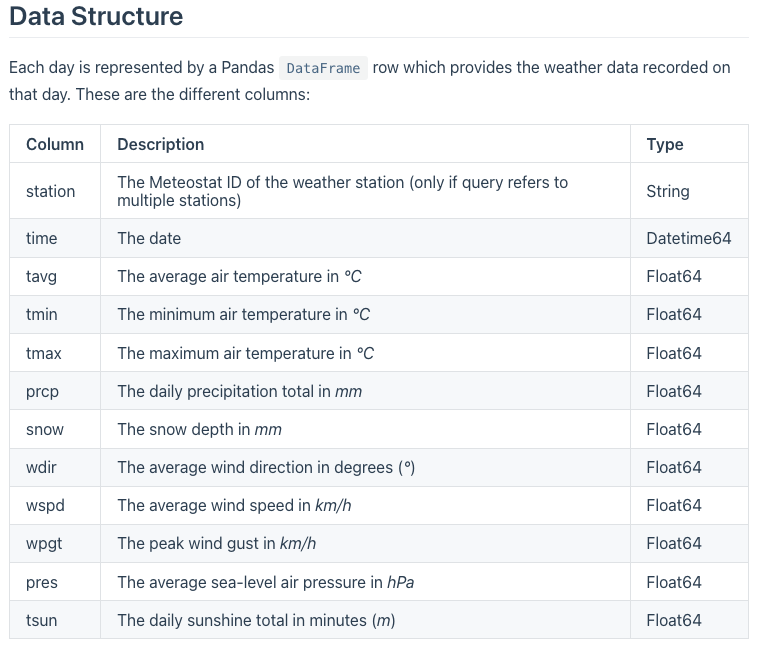

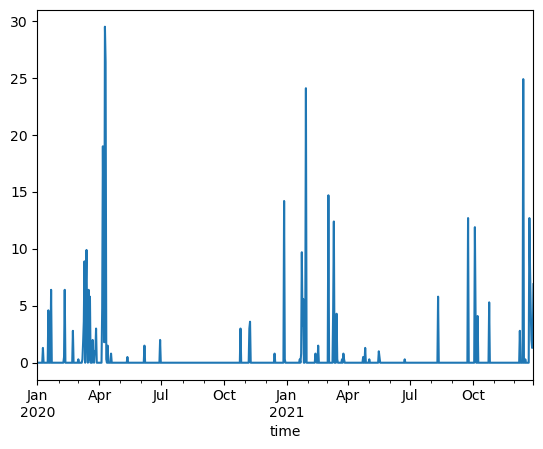

In [16]:
data['prcp'].plot();

# Find nearby weather stations

In [21]:
weather_stations = ms.Stations().nearby(crown_point[0], crown_point[1])
weather_stations = weather_stations.fetch(10)
print(weather_stations)

                                                name country region    wmo  \
id                                                                           
72290                San Diego International Airport      US     CA  72290   
72293                                   MCAS Miramar      US     CA  72293   
KSEE0  San Diego / Town And Country Mobile Home Park      US     CA   <NA>   
KNRS0                                 Imperial Beach      US     CA   <NA>   
KSDM0                            San Diego / Bandini      US     CA   <NA>   
KCRQ0        Carlsbad / Rancho Carlsbad Trailer Park      US     CA   <NA>   
KRNM0                              Ramona / Rosemont      US     CA   <NA>   
KOKB0          Oceanside / El Camino 76 Trailer Park      US     CA   <NA>   
KNFG0                             Oceanside / Chappo      US     CA   <NA>   
KNXF0                         Oceanside / Las Flores      US     CA   <NA>   

       icao  latitude  longitude  elevation             timezon

# searching for a rainier time period

min:  0.0
max:  40.4


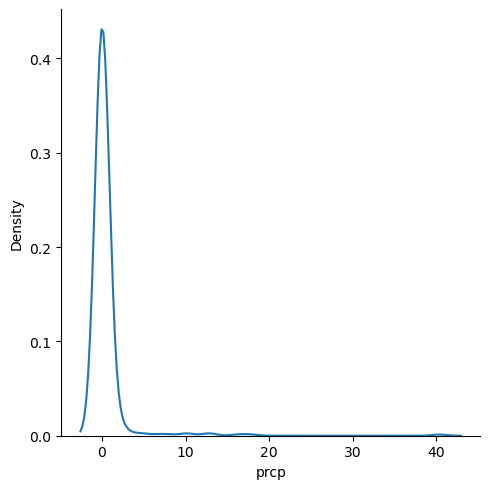

In [46]:
yr = 2000
start = dt(yr, 1, 1)
end = dt(yr, 12, 31)

crown_point = (32.786670, -117.238620)

diego = ms.Point(crown_point[0], crown_point[1], 70)

data = ms.Daily(diego, start, end)
data = data.fetch()['prcp']

print('min: ', data.min())
print('max: ', data.max())

sns.displot(data, kind='kde');

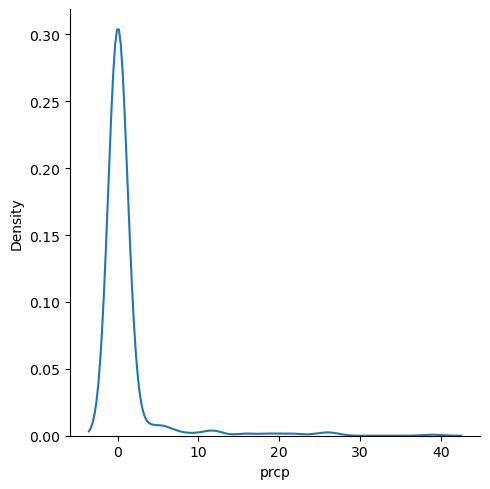

In [42]:
sns.displot(data, kind='kde')

In [28]:
print('min: ', data.min())
print('max: ', data.max())

min:  0.0
max:  59.4
